In [126]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [127]:
# Reading the file 
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [128]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [129]:
# Calculating the average order value 
Average_Order_Value = df['order_amount'].mean()
print(Average_Order_Value)

3145.128


Text(0, 0.5, 'Total Number of orders')

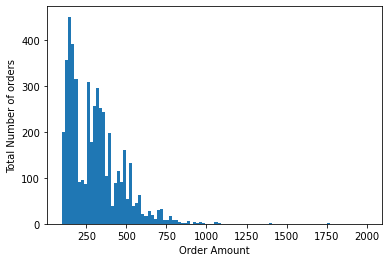

In [130]:
# Plotting the histogram to check 
hist_plot = plt.hist(df['order_amount'],range=[100, 2000],bins = 100)
plt.xlabel('Order Amount')
plt.ylabel('Total Number of orders')

In [131]:
(df['order_amount'] <= 800).sum()

4900

We can see from the above histogram and calculation that maximum number of orders (4900 out of 5000) has order amount less than 800. We can consider all the values greater than 800 as outliers for calculating the average. So the average order value has to be less than 800. 

In [132]:
# Calculating mode
order_amt_mode = df['order_amount'].mode()
print(order_amt_mode)

0    153
dtype: int64


In [133]:
# Calculating mean
order_amt_median = df['order_amount'].median()
print(order_amt_median)

284.0


In [134]:
# Creating secondary dataframe with no outliers
df_final = df[(df['order_amount'] <= 800)]

In [135]:
# Calculating mean without outliers
subset_mean = df_final['order_amount'].mean()

In [136]:
# Calculating standard deviation with the help of mean
statistics.pstdev(df_final['order_amount'],subset_mean)

150.1392116656799

In [137]:
# Calculating standard deviation with the help of median
statistics.pstdev(df_final['order_amount'],order_amt_median)

150.1392116656799

In [138]:
# Calculating standard deviation with the help of mode
statistics.pstdev(df_final['order_amount'],order_amt_mode[0])

150.136604464068

Conclusion: If we consider only 98% of the values, we can use any of the central tendency measures to calculate the average order value as the standard deviation between the mean,median, mode is quite negligible as proved above

# SQL Question 1 :
Query: SELECT Count(OrderID) 
FROM Orders O, Shippers S
where O.ShipperID = S.ShipperID
and S.ShipperName = 'Speedy Express'

#SQL Question 2:
SELECT LASTNAME
FROM
(SELECT E.LASTNAME , E.EMPLOYEEID, COUNT(O.EMPLOYEEID)
FROM Employees E, ORDERS O
WHERE E.EmployeeID = O.EmployeeID
GROUP BY O.EMPLOYEEID
ORDER BY COUNT(O.EMPLOYEEID) DESC)
LIMIT 1

# SQL Question 3: Since the questions wasnt clear

-- Calculating maximum times a productname is ordered 

SELECT ProductName
FROM (SELECT Od.ProductID,count(OD.ProductID),P.ProductName, C.CustomerID FROM OrderDetails OD, Products P, Orders O, Customers C
where OD.ProductID = P.ProductID
and O.Orderid = OD.Orderid
and O.CustomerID = C.CustomerID
and C.Country = 'Germany'
Group by OD.ProductID
order by count(OD.ProductID) desc)
LIMIT 1

--- Calculating maximum times a productname is ordered with quantity

SELECT ProductName
FROM (SELECT Od.ProductID,sum(OD.Quantity) as countt,P.ProductName, C.CustomerID FROM OrderDetails OD, Products P, Orders O, Customers C
where OD.ProductID = P.ProductID
and O.Orderid = OD.Orderid
and O.CustomerID = C.CustomerID
and C.Country = 'Germany'
Group by OD.ProductID
order by countt desc)
LIMIT 1